In [1]:
pip install scipy==1.2.2

In [3]:
import h5py
import glob
import numpy as np
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

import sklearn.metrics as metrics
import matplotlib.pyplot as plt
plt.ion()

path = "/content/drive/MyDrive/CS274P/data"

camfiles = sorted(glob.glob(path + "/camera/*.h5"))
logfiles = sorted(glob.glob(path + "/log/*.h5"))

In [2]:
pip install h5py=='2.9.0'

In [4]:
camfiles

['/content/drive/MyDrive/CS274P/data/camera/2016-01-30--11-24-51-008.h5',
 '/content/drive/MyDrive/CS274P/data/camera/2016-01-30--13-46-00-009.h5',
 '/content/drive/MyDrive/CS274P/data/camera/2016-01-31--19-19-25-001.h5',
 '/content/drive/MyDrive/CS274P/data/camera/2016-02-02--10-16-58-007.h5',
 '/content/drive/MyDrive/CS274P/data/camera/2016-02-08--14-56-28-004.h5',
 '/content/drive/MyDrive/CS274P/data/camera/2016-02-11--21-32-47-011.h5',
 '/content/drive/MyDrive/CS274P/data/camera/2016-03-29--10-50-20-010.h5',
 '/content/drive/MyDrive/CS274P/data/camera/2016-04-21--14-48-08-003.h5',
 '/content/drive/MyDrive/CS274P/data/camera/2016-05-12--22-20-00-006.h5',
 '/content/drive/MyDrive/CS274P/data/camera/2016-06-02--21-39-29-005.h5',
 '/content/drive/MyDrive/CS274P/data/camera/2016-06-08--11-46-01-002.h5']

In [5]:
logfiles

['/content/drive/MyDrive/CS274P/data/log/2016-01-30--11-24-51.h5',
 '/content/drive/MyDrive/CS274P/data/log/2016-01-30--13-46-00.h5',
 '/content/drive/MyDrive/CS274P/data/log/2016-01-31--19-19-25.h5',
 '/content/drive/MyDrive/CS274P/data/log/2016-02-02--10-16-58.h5',
 '/content/drive/MyDrive/CS274P/data/log/2016-02-08--14-56-28.h5',
 '/content/drive/MyDrive/CS274P/data/log/2016-02-11--21-32-47.h5',
 '/content/drive/MyDrive/CS274P/data/log/2016-03-29--10-50-20.h5',
 '/content/drive/MyDrive/CS274P/data/log/2016-04-21--14-48-08.h5',
 '/content/drive/MyDrive/CS274P/data/log/2016-05-12--22-20-00.h5',
 '/content/drive/MyDrive/CS274P/data/log/2016-06-02--21-39-29.h5',
 '/content/drive/MyDrive/CS274P/data/log/2016-06-08--11-46-01.h5']

In [6]:
cams = h5py.File(camfiles[0], 'r')[('X')]
cams

<HDF5 dataset "X": shape (52722, 3, 160, 320), type "|u1">

In [7]:
logs = h5py.File(logfiles[0], 'r') 
logs

<HDF5 file "2016-01-30--11-24-51.h5" (mode r)>

In [8]:
cam1_ptrs = logs[('cam1_ptr')].value
cam1_ptrs

array([0., 0., 0., ..., 0., 0., 0.])

In [9]:
nframes = len(cams)
initial = np.zeros(nframes, dtype = np.uint32)
initial[0] = 37
current = 1

for i in range(len(cam1_ptrs)):
  if int(cam1_ptrs[i]) == current:
    initial[current] = i
    current += 1

In [10]:
initial

array([    37,     42,     47, ..., 263565, 263570, 263575], dtype=uint32)

In [20]:
speed = logs['speed'].value
speed

array([0., 0., 0., ..., 0., 0., 0.])

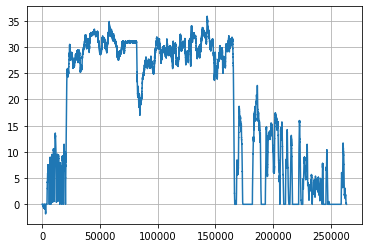

In [21]:
plt.plot(speed)
plt.grid()
plt.show()

In [22]:
accel = logs['car_accel'].value
accel

array([0., 0., 0., ..., 0., 0., 0.])

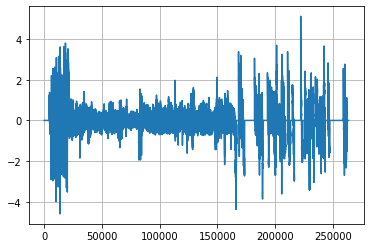

In [23]:
plt.plot(accel)
plt.grid()
plt.show()

In [24]:
steer = logs['steering_angle'].value
steer

array([80., 80., 80., ..., 42., 42., 42.])

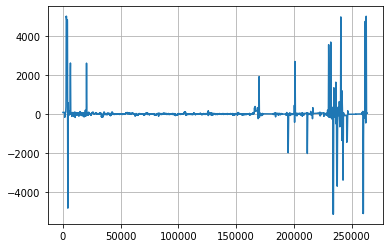

In [25]:
plt.plot(steer)
plt.grid()
plt.show()

In [26]:
gas = logs['gas'].value
gas

array([0., 0., 0., ..., 0., 0., 0.])

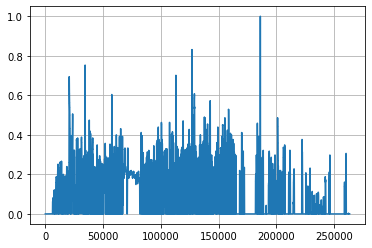

In [27]:
plt.plot(gas)
plt.grid()
plt.show()

In [28]:
brake = logs['brake'].value
brake

array([63872., 63872., 63872., ...,   736.,   736.,   736.])

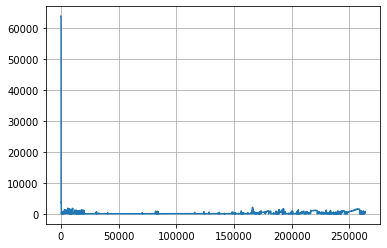

In [29]:
plt.plot(brake)
plt.grid()
plt.show()

In [30]:
cams[0]

array([[[21, 22, 21, ..., 23, 21, 22],
        [22, 22, 21, ..., 24, 23, 23],
        [23, 21, 21, ..., 22, 24, 23],
        ...,
        [20, 22, 22, ..., 21, 21, 23],
        [22, 22, 21, ..., 22, 20, 22],
        [20, 22, 22, ..., 20, 21, 20]],

       [[18, 21, 18, ..., 21, 21, 22],
        [19, 18, 20, ..., 20, 20, 21],
        [20, 20, 18, ..., 18, 19, 21],
        ...,
        [18, 21, 19, ..., 18, 18, 19],
        [19, 19, 18, ..., 20, 18, 19],
        [18, 18, 19, ..., 19, 19, 19]],

       [[46, 46, 46, ..., 48, 51, 45],
        [45, 45, 42, ..., 45, 44, 46],
        [44, 49, 43, ..., 45, 43, 45],
        ...,
        [46, 44, 41, ..., 45, 43, 42],
        [48, 47, 58, ..., 51, 45, 42],
        [40, 42, 41, ..., 42, 42, 43]]], dtype=uint8)

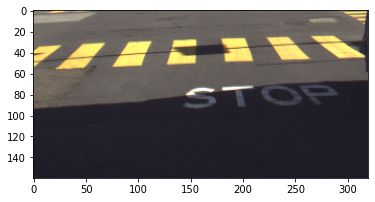

In [31]:
plt.imshow(cams[2000].transpose(1,2,0))
plt.show()

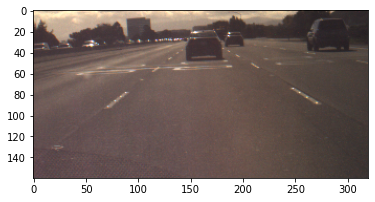

In [32]:
plt.imshow(cams[10000].transpose(1,2,0))
plt.show()

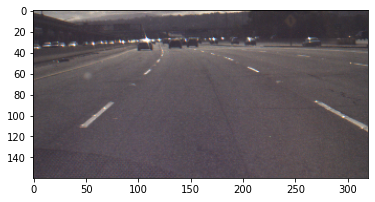

In [33]:
plt.imshow(cams[15000].transpose(1,2,0))
plt.show()

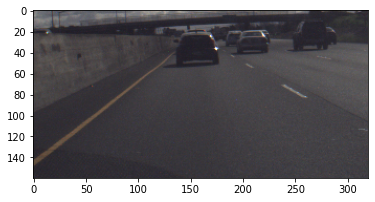

In [34]:
plt.imshow(cams[25000].transpose(1,2,0))
plt.show()

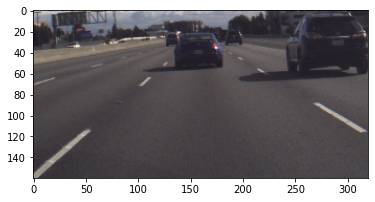

In [35]:
plt.imshow(cams[30000].transpose(1,2,0))
plt.show()